# ML3: Decision Tree Classification

By: Chris

## Importing the libraries

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [273]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

## Clean Dataset

In [274]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
0,1,Male,19,15000,39,Healthcare,1,4,1,5
1,2,Male,21,35000,81,Engineer,3,3,1,2
2,3,Female,20,86000,6,Engineer,1,1,0,2
3,4,Female,23,59000,77,Lawyer,0,2,0,7
4,5,Female,31,38000,40,Entertainment,2,6,0,3


## K-Nearest Neighbors Classification

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

# Split the dataset into training and testing sets
X = df[['Age', 'Annual Income ($)']]
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of DecisionTreeClassifier class with max_depth = 2
classifier = DecisionTreeClassifier(max_depth=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [276]:
print(X_train)

      Age  Annual Income ($)
567    99             172896
748    41             111174
159    30              86000
1170   10             180774
318    66             182937
...   ...                ...
840    76              90082
1221   70              81197
1658   81             171194
562     0             142892
689    13             156951

[1596 rows x 2 columns]


In [277]:
print(X_test)

      Age  Annual Income ($)
407    18             103896
1192   84             172523
679    89             137397
1360    8              57605
815    81              53452
...   ...                ...
718    15              50550
1454    7             135773
360    90             164914
1810   94              65483
774    83             156839

[399 rows x 2 columns]


## Training the Decision Tree Classification model on the Training set

In [282]:
# Create an instance of DecisionTreeClassifier class with max_depth = 3
classifier = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Visualize the Decision Tree Classifieer

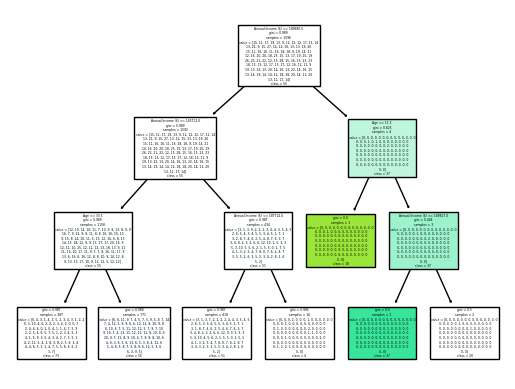

In [283]:
# Visualize the decision tree
unique_classes = np.unique(y_train)
class_names = [str(cls) for cls in unique_classes]

_ = tree.plot_tree(classifier, 
                   feature_names = ['Age', 'Annual Income ($)'],
                   class_names=class_names,
                   filled=True)